In [ ]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from collections import Counter

from IPython.display import display

In [ ]:
years = range(1990,2022)
for y in years:
    locals()['Gorg' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\orgorg4\orgorg4_single' +
                                               str(y) +
                                               '.gpickle')
    print(y)

In [391]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, A, n, x):
    
    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Achoosex = comb(A,x)
    NAchoosenx = comb(N-A, n-x)
    Nchoosen = comb(N,n)
    
    return (Achoosex)*NAchoosenx/Nchoosen

In [389]:
def hypergeom_cdf(N, A, n, t, min_value=None):
    
    '''
    Cumulative Density Funtion for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param t: number of desired items in our draw of n items up to t
    :returns: CDF computed up to t
    '''
    if min_value:
        return np.sum([hypergeom_pmf(N, A, n, x) for x in range(min_value, t+1)])
    
    return np.sum([hypergeom_pmf(N, A, n, x) for x in range(t+1)])

In [ ]:
def plot_degree_dist(G):
    hist = nx.degree_histogram(G)
    q = [w+1 for w in hist]
    q = np.log(q[1:])
    
    plt.subplot(7,3, y-2000)
    x = np.log(range(1, len(hist)))
    plt.plot(x, q, ".")
    plt.title(str(y))
    
    #plt.loglog()
    m, b = np.polyfit(x, q, 1)
    plt.plot(x, m*x + b)
    #print(y)
    #print(m)
    #print(' ')

In [354]:
def get_succ(status):
    if status == 'Acquired':
        return 1
    if status == 'Alive / Active':
        return 0
    if status == 'IPO / Went public':
        return 1
    if status == 'Merged':
        return 1
    else:
        return 0
    
    


In [ ]:
f, axs = plt.subplots(7,3,figsize=(15,15), sharex=True, sharey=True)

for y in range(2001,2022):
    plot_degree_dist(locals()['Gorg' + str(y)])
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
plt.show()

In [ ]:
orgs.columns

### Most important

In [ ]:
bidders = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariate_bidbid_final_final2.csv') # <-- relative path
orgs = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariates_orgorg_final2.csv') # <-- relative path


In [ ]:
nodes = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\nodes.csv') # <-- relative path
covariates = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\covariates.csv')

In [ ]:
bidders = pd.merge(bidders, nodes, on = 'id')
orgs = pd.merge(orgs,nodes, on = 'id')

In [ ]:
orgs2 = pd.merge(orgs, covariates, on = 'id')

In [ ]:
covariates.columns

In [ ]:
bonav = covariates[covariates.date < covariates.foundation +3]

In [ ]:
for y in range(1995,2022):
    print(y, " ", len(bonav[bonav.foundation == y]))

In [117]:
df_s = pd.DataFrame({'current_sit': outcome, 'success' : success})

In [359]:
outcome = list(set(b12['current_sit']))
succsetess = [0,0,1,1,0,1]

bonav2 = pd.merge(bonav, df_s, on = 'current_sit')
bonav3 = pd.merge(bonav2, df_st8, on = 'id')

st8 = []
for i in tqdm(range(0,len(bonav3))):
    st8.append(get_succ(bonav3.iloc[i,:]['st8']))

  0%|          | 0/4307 [00:00<?, ?it/s]

In [360]:
bonav3['succ8'] = st8

In [383]:
b12 = bonav3[bonav3['foundation']<2013]
#b12 = b12[b12['first_money']<10000000]
b12 = b12[['closeness_centrality_org', 'current_sit','success','stage', 'st8', 'succ8','first_money','id', 'node','st8']]
b12 = b12[b12['closeness_centrality_org'].notnull()]

In [444]:
moves = []
p = []
N = len(b12)
A = sum(b12['succ8'])

for i in range(20,250):
    t = sum(b12.sort_values(ascending=False, by = 'closeness_centrality_org')[0:i]['succ8'])
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))

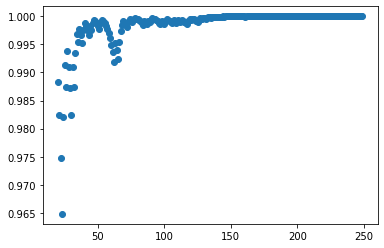

In [449]:
plt.scatter(range(20,250),p)

In [386]:
sum(b12['succ8'])/len(b12)

0.24550898203592814

In [ ]:
len(b12[(b12.first_money>10^6) & (b12.first_money<10^8)])

In [ ]:
for y in range(1995,2021):
    display(orgs[['closeness_centrality' + str(y), 'node', 'country', 'industry']].sort_values(ascending=False, 
                                                                                            by = 'closeness_centrality' + str(y)).iloc[0:30,:])

In [251]:
b12.sort_values(ascending=False, by = 'closeness_centrality_org')[0:1000]

,closeness_centrality_org,current_sit,success,stage,st8,succ8,first_money
2806,0.411731,Acquired,1,Series A,Alive / Active,0,6.986232e+07
2801,0.410927,Acquired,1,Series A,Alive / Active,0,7.546792e+07
3193,0.410596,Acquired,1,Series B,Alive / Active,0,6.362443e+07
2812,0.410262,Acquired,1,Series A,Alive / Active,0,3.697252e+07
3259,0.406963,Acquired,1,Convertible Note,Alive / Active,0,8.166915e+06
...,...,...,...,...,...,...,...
3019,0.300429,Acquired,1,Seed VC,2,0,1.117432e+06
457,0.300369,Alive / Active,0,Seed VC,2,0,2.750534e+06
3796,0.300265,IPO / Went public,1,Seed VC,Alive / Active,0,1.568192e+07
2460,0.300189,Alive / Active,0,Seed,2,0,2.329061e+04


# Definizione Classica

In [ ]:
cb1 = pd.read_csv('cb1.csv')
cb2 = pd.read_csv('cb2.csv')
cb3 = pd.read_csv('cb3.csv')
cb = cb1.append(cb2)
cb = cb.append(cb3)
cb.index = range(len(cb))
cb['date_my'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('m')
cb['date_y'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('y')

nodes_org = cb[['target_name', 'target_ID']].drop_duplicates()
nodes_org['bipartite'] = 1
nodes_inv = cb[['investors_name', 'investor_id']].drop_duplicates()
nodes_org = nodes_org.rename(columns={"target_name": "node", "target_country": "country", 
                                      "target_continent": "continent", "industry":"industry",
                                     "target_ID":"index"})
nodes_inv = nodes_inv.rename(columns={"investors_name": "node","investor_country": "country", 
                                      "investor_continent": "continent", "investor_type":"industry","investor_id":'index' })
nodes_inv['bipartite'] = 0
nodes = nodes_org.append(nodes_inv, ignore_index= True)
nodes['id'] = nodes.index

numbers = cb.groupby(['target_name','stage'], as_index = False).count()[['target_name','stage','investors_name']].rename(columns={"investors_name": "investor_numbers"})
cb_new = pd.merge(cb, numbers,  how='left', left_on=['target_name','stage'], right_on = ['target_name','stage'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 1],  how='left', left_on=['target_name','target_ID'], right_on = ['node','index'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 0],  how='left', left_on=['investors_name','investor_id'], right_on = ['node','index'])


In [ ]:
stati = cb_new.groupby('id_x')
stati2 = stati.tail(1).reset_index(drop=True)
stati3 = stati2[stati2["date"].notna()]

stati2[stati2["target_status"] == "Merged"].drop_duplicates()[["target_name","round_simp","target_status", "date"]]
fun_status = stati2[["round_simp", "target_status"]].groupby(['round_simp', "target_status"]).size().unstack(fill_value=0)[1:61]
fun_status.T.index.values

fun_status.mode()['Dead / Inactive']
stage = list(fun_status.idxmax(axis=1).index)
stage.append("Acq - P2P")

stato = list(fun_status.idxmax(axis=1))
stato.append("Acquired")

set(stato)

In [ ]:
def get_status(rounds):
    a = list()
    for i in rounds:
        indice = stage.index(i)
        a.append(stato[indice])
    return a
    
    


In [ ]:
get_status(['Dead'])

In [348]:
df = cb_new
df['date_y']=df['date_y'].dt.year
df = df[df['date_y']>0]
ids = set(df['id_x'])

company = []
status_8 = []
for i in tqdm(ids):
    sub = df[df['id_x']== i][['id_x', 'date_y', 'round_simp']]
    sub = sub[(sub['date_y']<sub['date_y'].values[0]+8) & (sub['date_y'].values[0] < 2013)].tail(1)
    company.append(i)
    roun = sub['round_simp']
    status_8.append(get_status(roun))
    if i % 1000 == 0:
        print(i)
    
    
    
    

  0%|          | 0/46824 [00:00<?, ?it/s]

0
500
1000
1500
2000
2500
3000
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000


In [349]:
stati_8 = [x[0] if len(x) >= 1 else 2 for x in status_8]

In [ ]:
Counter(stati_8)

In [351]:
df_st8 = pd.DataFrame({'id' : company, 'st8' : stati_8})

In [150]:
len(stati_8)

27253

In [194]:
df_st8

,id,st8
0,15,Alive / Active
1,16,Alive / Active
2,17,Alive / Active
3,18,Alive / Active
4,19,Alive / Active
...,...,...
27248,50445,2
27249,50448,2
27250,50450,2
27251,50451,2
